### 목표 : 생선 품종 분류 모델
- 데     이     터 : fish.csv
- f e a t u r e  : Weight, Length
- target(=label) : Species
- 기  계  학  습   : 지도학습 + 분류 ( 도미Bream, 빙어Smelt 분류는 이진분류 )

#### (1) 모듈 로딩 및 데이터 준비
<hr>

In [46]:
# 데이터분석 모듈 로딩
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

In [47]:
# 데이터 파일 설정
data_file = '../data/fish.csv'

In [48]:
# DF로 데이터 파일 준비
fishDf= pd.read_csv(data_file, usecols=[0,1,2])

# 기본정보 확인
fishDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


#### (2) 데이터 전처리
- 결측치, 중복데이터, 이상치
<hr>

In [135]:
# 컬럼별 고유값으로 이상치 체크 => unique()
fishDf.Species.unique()
fishDf.Weight.unique()
fishDf.Length.unique()
fishDf.tail()

,Species,Weight,Length
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3
158,Smelt,19.9,15.0


In [50]:
# 결측치 체크 => isna() / isnull()
fishDf.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [51]:
# 중복데이터 => duplicated()
fishDf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Length: 159, dtype: bool

In [133]:
## 'Bream', 'Smelt' 값 추출
mask = fishDf.Species.isin(['Bream', 'Smelt'])
twoFishDF = fishDf[mask]
twoFishDF.info()

# 인덱스 리셋 : 기존의 인덱스 삭제 후 0-base 인덱스 설정
# Scikit-learn에 저장 시 ndarray 타입으로 저장되면서 인덱스 정리
twoFishDF = twoFishDF.reset_index(drop=True)

print(twoFishDF.head(3), twoFishDF.tail(3), sep='\n')

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB
  Species  Weight  Length
0   Bream   242.0    25.4
1   Bream   290.0    26.3
2   Bream   340.0    26.5
   Species  Weight  Length
46   Smelt    12.2    13.0
47   Smelt    19.7    14.3
48   Smelt    19.9    15.0


#### (3) 학습용 데이터 준비 => 피쳐 + 타겟 분리
<hr>

In [118]:
# 피쳐 데이터 추출
feature = twoFishDF[twoFishDF.columns[1:]]
feature

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
5,450.0,29.7
6,500.0,29.7
7,390.0,30.0
8,450.0,30.0
9,500.0,30.7


In [119]:
# 타겟 데이터 추출
target = twoFishDF.Species

# Bream = 0, Smelt =1 로 변환
# sklearn이 업데이트 되면서 문자열 넣었을 때 에러나는 경우 있어서 정수형으로 바꿈
target = target.replace({'Bream':0, 'Smelt':1}).copy()

# 데이터 확인
print(target.head(3), target.tail(3), sep='\n\n')

0    0
1    0
2    0
Name: Species, dtype: int64

46    1
47    1
48    1
Name: Species, dtype: int64


#### (4) 학습 진행
- 알고리즘 구현 인스턴스 생성 => 지도학습 - 분류 알고리즘 중 선택 : KNN
- 학습 진행 메서드 => fit()
<hr> 

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
# (4-1) KNN 인스턴스 생성
model=KNeighborsClassifier()

model   

KNeighborsClassifier()

In [122]:
# (4-2) 학습 진행 (2차원, 1차원)
model.fit(feature,target)

KNeighborsClassifier()

In [123]:
# 학습 후 속성 확인 => 속성명_ : 모델 파라미터 -> 모델 학습 후 자동으로 생성 및 저장됨!
print("classes_ : ", model.classes_)
print("feature_name_in_ : ", model.feature_names_in_)
print("n_features_in_ : ", model.n_features_in_)


classes_ :  [0 1]
feature_name_in_ :  ['Weight' 'Length']
n_features_in_ :  2


#### (5) 학습 후 검사 즉 테스트 => 메서드 : score()
- 결과값 : 0.0(0%) ~ 1.0(100%)
- 사용 데이터 : 학습에 사용되지 않은 데이터
<hr> 

In [174]:
model.score(feature,target)

1.0

#### (6) 예측 즉 서비스에 모델 활용 시 사용 => 메서드 : predict(), predict_proba()
- 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달
<hr> 

In [189]:
# [무게, 길이]
new_data = pd.DataFrame([[19.9, 15]], columns=['Weight', 'Length'])

# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = model.predict(new_data)
pred_y

prd_y1 = model.predict_proba(new_data)
prd_y1

array([[0., 1.]])

In [176]:
# 예측 확률
model.predict_proba(new_data)

array([[0., 1.]])

In [177]:
# 데이터와 최근접 이웃 데이터
model.kneighbors(new_data)
# 원래 데터는 pandas DF인데
# new_data는 numpy array라서 인덱스가 다름
# => 인덱스 리셋에서 기존의 인덱스를 drop한 것

(array([[0.        , 0.72801099, 7.00071425, 7.95550124, 8.19328994]]),
 array([[48, 47, 45, 46, 44]]))

In [178]:
feature.index, feature.shape

(RangeIndex(start=0, stop=49, step=1), (49, 2))

<Axes: >

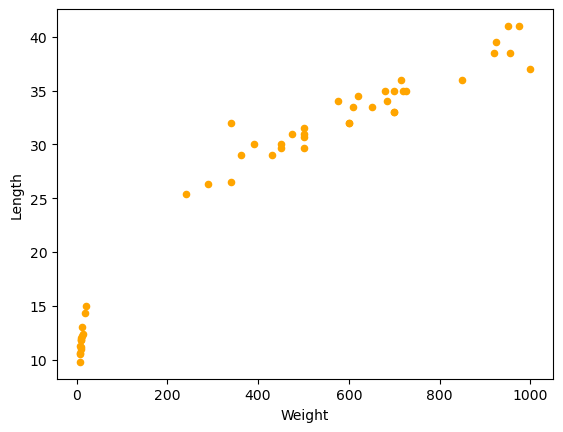

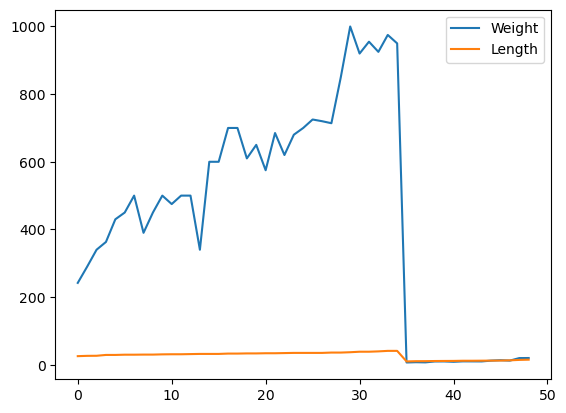

In [179]:
# Weight & Length 시각화
import matplotlib.pyplot as plt
import seaborn

# pandas의 Series, DataFrame의 plot()메서드
# colormap = 'viridis'
feature.plot(kind='scatter', x='Weight', y='Length', c='orange')
feature.plot()
# feature.plot(new_data.Weight, new_data.Length, c='red')

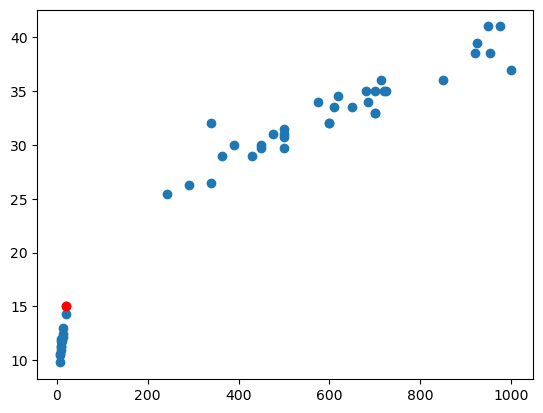

In [180]:
plt.scatter(x=feature.Weight, y=feature.Length)
# plt.plot(x=new_data.Weight, y=new_data.Length)
plt.plot(new_data.Weight[0], new_data.Length[0], 'ro')
plt.show()

In [181]:
new_data

,Weight,Length
0,19.9,15


In [182]:
feature.index, feature.shape

(RangeIndex(start=0, stop=49, step=1), (49, 2))

In [183]:
# 데이터와 최근접 이웃 데이터 찾기 => kneighbors()메서드
# 반환값 : 거리, 원소번호
dis, ind = model.kneighbors(new_data)

# ndarray => list
# ind.tolist()[0]

In [184]:
# K개의 최근접 이웃 데이터만 저장
kneighDF=feature.iloc[ind.tolist()[0]]


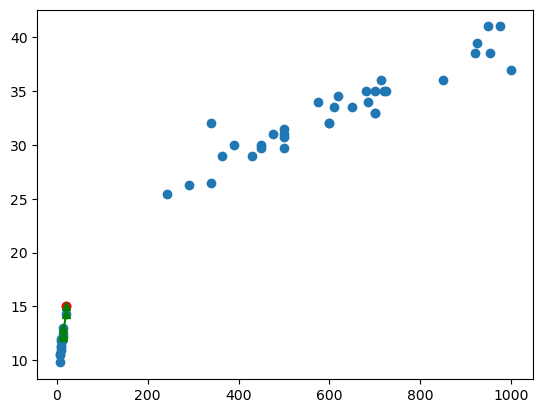

In [185]:
plt.scatter(x=feature.Weight, y=feature.Length)

plt.plot(new_data.Weight[0], new_data.Length[0], 'ro')

plt.plot(kneighDF.Weight, kneighDF.Length, 'g^-')

plt.show()


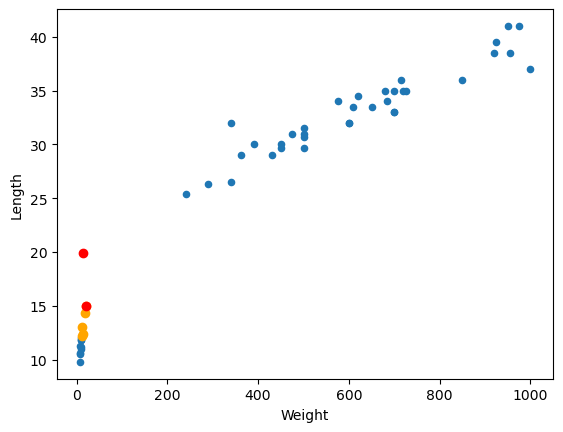

In [186]:
feature.plot(kind="scatter",x="Weight",y="Length")

plt.plot(new_data.Length.to_list()[0],new_data.Weight.to_list()[0],"ro")
plt.plot(new_data.Weight[0], new_data.Length[0], 'ro')

x,y = model.kneighbors(new_data)

plt.scatter(feature.loc[y[0]].Weight.to_list(),feature.loc[y[0]].Length.to_list(),c="orange",marker="o")

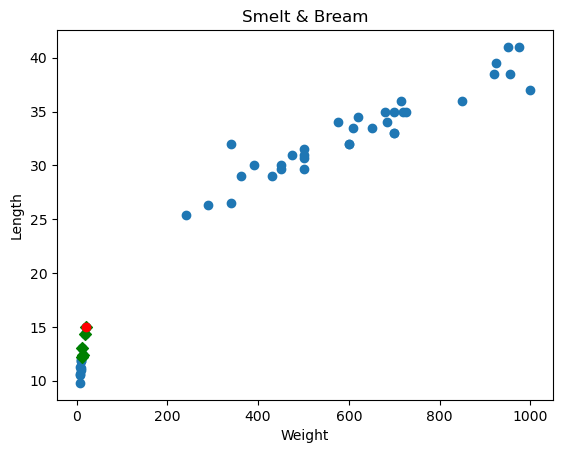

In [187]:
dis, idx = model.kneighbors(new_data)

feature.plot.scatter(x='Weight', y='Length', title='Smelt & Bream')

plt.scatter(x=feature.Weight, y=feature.Length)


# ㅐㅅ로운 데이터 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 새로운 데이터의 k개 최근접 이웃 데이터 시각화
xs = feature.iloc[idx[0]].Weight
ys = feature.iloc[idx[0]].Length

plt.scatter(x=xs, y=ys, marker='D', color='g')

plt.show()

In [195]:
import numpy as np
a = np.array([[1,2,3,],[1,2,3]])
a

array([[1, 2, 3],
       [1, 2, 3]])

In [196]:
a.flatten()

array([1, 2, 3, 1, 2, 3])